## Car Evaluation Dataset

### Treating the categorical variable as Ordinal Values

In [1]:
#Importing the dataset
import pandas as pd

df = pd.read_csv("car_data.csv")

In [2]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [67]:
#We would do custom mapping to convert the categorical variable into ordinal variable 
df['buying'].unique()
df['buying'] = df['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})

df['maint'].unique()
df['maint'] = df['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})

df['lug_boot'].unique()
df['lug_boot'] = df['lug_boot'].map({'small':1, 'med':2, 'big':3})

df['safety'].unique()
df['safety']= df['safety'].map({'low':1, 'med':2, 'high':3})

df['doors'].unique()
df['doors'] = df['doors'].map({'2':2, '3':3, '4':4, '5more':5})

df['persons'].unique()
df['persons'] = df['persons'].map({'2':2, '4':4, 'more':5})

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [5]:
from sklearn import linear_model, metrics, preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.target)
df.target = le.transform(df.target)

In [6]:
X = df.iloc[:,list(range(0,len(df.columns)-1))]
y = df.iloc[:, 6]

In [7]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


In [8]:
y.head()
y.unique()

array([2, 0, 3, 1])

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [10]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,3.666667,2.000000,2.000000,1.553241
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.875948
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,2.000000
75%,3.250000,3.250000,4.250000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   target    1728 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 87.9 KB


In [12]:
y.value_counts()

2    1210
0     384
1      69
3      65
Name: target, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   target    1728 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 87.9 KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# transform the dataset
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from imblearn.over_sampling import SMOTE
strategy = {0:1200, 1:1200, 2:1200, 3:1200}
oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [17]:
pd.DataFrame(y_train).value_counts()

target
0         1200
1         1200
2         1200
3         1200
dtype: int64

## Choosing best model through Nested Cross Validation


In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,classification_report, recall_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.naive_bayes import MultinomialNB

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,classification_report, recall_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

### 'Accuracy' as the performance evaluation metric for best model selection. 

#### Exploring how well various models  perform for several different parameter values when accuracy is the evaluation metric. 

In [20]:
scoring = 'accuracy'
dt_cv_score = []
knn_cv_score = []
log_cv_score = []
svc_cv_score = []
nb_cv_score = []

N_TRIALS = 10
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}

    nb = MultinomialNB()
    nb_grid = {'alpha': [1, 1e-1, 1e-2]}
    
    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1,0.05, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}

    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = 'accuracy')
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = 'accuracy')
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = 'accuracy')
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = 'accuracy')
    nb_clf = GridSearchCV(estimator = nb, param_grid = nb_grid, cv = inner_cv, scoring = 'accuracy')
    
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    dt_score = dt_score.mean()
    dt_cv_score.append(dt_score.mean())    

    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    knn_score = knn_score.mean()
    knn_cv_score.append(knn_score.mean())    
   
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    lr_score = lr_score.mean()
    log_cv_score.append(lr_score.mean())
        
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    svc_score = svc_score.mean()
    svc_cv_score.append(svc_score.mean())
    
    nb_score=cross_val_score(nb_clf,X_train,y_train, cv = outer_cv)
    nb_score = nb_score.mean()
    nb_cv_score.append(nb_score.mean())     
        
# print("Mean accuracy for training data set with 5 cross validations for decision tree:",dt_cv_score)
# print("Mean accuracy for training data set with 5 cross validations for KNN:",knn_cv_score)
# print("Mean accuracy for training data set with 5 cross validations for logistic regression:",log_cv_score)
# print("Mean accuracy for training data set with 5 cross validations for SVM:",svc_cv_score)

In [21]:
#Assign a function to calculate the mean of the accuracies 
def Average(lst):
    return sum(lst) / len(lst)

In [22]:
dt_avg = Average(dt_cv_score)
knn_avg = Average(knn_cv_score)
log_avg = Average(log_cv_score)
svc_avg = Average(svc_cv_score)
nb_avg = Average(nb_cv_score)

print(dt_avg)
print(knn_avg)
print(log_avg)
print(svc_avg)
print(nb_avg)

0.9808333333333332
0.9672916666666668
0.8816666666666668
0.9862500000000001
0.6729166666666666


It is observed that SVM is performing best out of all the models from Nested Cross Validation Output when accuracy is considered as performance evaluation metric

## 'Recall' as performance evaluation metric for Best Model Selection

#### Exploring how well various models  perform for several different parameter values when recall is the evaluation metric. 

Decision Tree Classifier

In [51]:
import numpy as np
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_dt_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    dt = DecisionTreeClassifier(random_state=42)
    dt_grid = {'max_depth':list(range(0,10)),'min_samples_leaf':[2, 3, 4], 'min_samples_split':[10, 20, 30], 
                 'criterion':['entropy','gini']}   
    dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = inner_cv, scoring = scoring)   
    dt_score=cross_val_score(dt_clf,X_train,y_train, cv = outer_cv)
    nested_scores_dt_re[i] = dt_score.mean()     
print("Mean recall for training data set with cross validations for decision tree:",nested_scores_dt_re.mean())

Mean recall for training data set with cross validations for decision tree: 0.9642736808742705


KNN Classifier 

In [52]:
import numpy as np
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_knn_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=i)
    knn = KNeighborsClassifier()
    knn_grid = {'n_neighbors':list(range(2,8)), 'p':[1,2,3], 'weights':['uniform','distance']}
    knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = inner_cv, scoring = scoring)  
    knn_score=cross_val_score(knn_clf,X_train,y_train, cv = outer_cv)
    nested_scores_knn_re[i] = knn_score.mean()    
    
print("Mean recall for training data set with cross validations for KNN classifier:",nested_scores_knn_re.mean())

Mean recall for training data set with cross validations for KNN classifier: 0.9559604613125776


Logistic Regression

In [53]:
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_log_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    log = LogisticRegression(random_state=42, multi_class = 'multinomial')
    lr_grid = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'penalty' : ['l1','l2'],'solver': ['lbfgs','liblinear','sag','saga','newton-cg']}
    lr_clf = GridSearchCV(estimator = log, param_grid = lr_grid, cv = inner_cv, scoring = scoring)
    lr_score=cross_val_score(lr_clf,X_train,y_train, cv = outer_cv)
    nested_scores_log_re[i] = lr_score.mean() 
    
print("Mean recall for training data set with cross validations for Logistic Regression classifier:",nested_scores_log_re.mean())

Mean recall for training data set with cross validations for Logistic Regression classifier: 0.8646740006048672


Support Vector Machine Classifier

In [54]:
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_svc_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    svc = SVC(random_state = 42, probability=True)
    svc_grid = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    svc_clf = GridSearchCV(estimator = svc, param_grid = svc_grid, cv=inner_cv, scoring = scoring)
    svc_score=cross_val_score(svc_clf,X_train,y_train, cv = outer_cv)
    nested_scores_svc_re[i] = svc_score.mean()
    
print("Mean recall for training data set with cross validations for SVC classifier:",nested_scores_svc_re.mean())

Mean recall for training data set with cross validations for SVC classifier: 0.984334495829045


Naive Bayes Classifier 

In [55]:
from sklearn.naive_bayes import MultinomialNB
scoring = 'recall_macro'
N_TRIALS = 5
nested_scores_nb_re = np.zeros(N_TRIALS)
for i in range(N_TRIALS):
    inner_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    outer_cv=KFold(n_splits=5,shuffle=True,random_state=100)
    nb = MultinomialNB()
    nb_grid = {'alpha': [1, 1e-1, 1e-2]}
    nb_clf = GridSearchCV(estimator = nb, param_grid = nb_grid, cv = inner_cv,scoring = scoring)
    nb_score=cross_val_score(nb_clf,X_train,y_train, cv = outer_cv, scoring = scoring)
    nested_scores_nb_re[i] = nb_score.mean() 
    
print("Mean recall for training data set with cross validations for Multinomial NB classifier:",nested_scores_nb_re.mean())

Mean recall for training data set with cross validations for Multinomial NB classifier: 0.49173921648181357


#### When recall is used as a performance evaluation metric, SVM again performs the best out of all 5 models. 

Various Model Performance on Holdout/Testing Data has been summarized in a tabular form for both accuracy and recall as evaluation metric

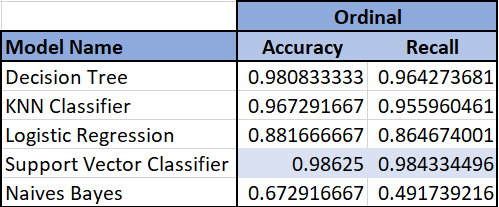

## Hyper Parameter Tuning for SVM Model Using Grid Search CV

In [59]:
parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5],'C': [1, 10, 100, 1000]}, 
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

Grid scores on development set:

0.966 (+/-0.019) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.980 (+/-0.008) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.012) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.984 (+/-0.014) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.012) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.985 (+/-0.014) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.012) for {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
0.902 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.909 (+/-0.026) for {'C': 10, 'kernel': 'linear'}
0.908 (+/-0.021) for {'C': 100, 'kernel': 'linear'}
0.908 (+/-0.025) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation 

#### Plotting the accuracy score vs C to check the model overfitting trend

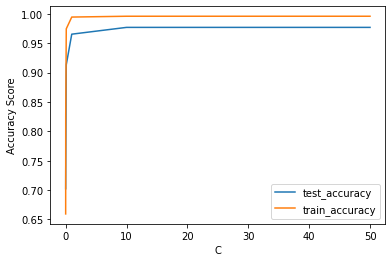

In [60]:
from sklearn.metrics import accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 50]
train_accuracy = []
test_accuracy = []

for i in C:
    clf = SVC(C= i, kernel = 'rbf', gamma = 0.5, random_state=42)
    clf.fit(X_train,y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

# Accuracy Plot
plt.plot(C, test_accuracy,label='test_accuracy')
plt.plot(C, train_accuracy,label='train_accuracy')
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

It is clear from the graph above that beyond C= 10, the accuracy for testing dataset is going down while for training, 
it is increasing/constant, which indicates that the model might overfit the training data and loose generalisability beyond C = 10.

In [62]:
clf_rbf = SVC(C=10, gamma = 0.5, kernel = 'rbf', random_state = 42, probability=True)
clf_rbf.fit(X_train, y_train)
best_train_predictions_new = clf_rbf.predict(X_train)
print(classification_report(y_test, clf_rbf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        83
           1       0.61      1.00      0.76        11
           2       1.00      1.00      1.00       235
           3       0.94      1.00      0.97        17

    accuracy                           0.98       346
   macro avg       0.89      0.98      0.92       346
weighted avg       0.98      0.98      0.98       346



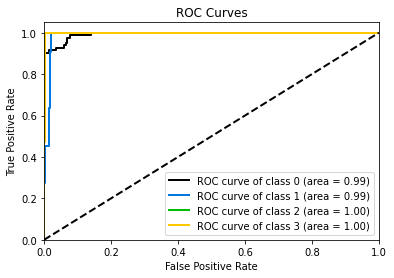

In [63]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, clf_rbf.predict_proba(X_test), plot_micro =False, plot_macro = False)
plt.show()

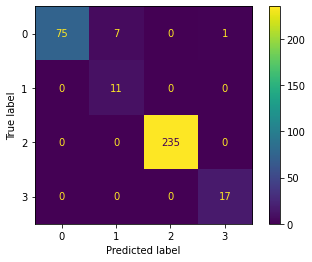

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rbf, X_test, y_test)
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
print("The accuracy score of SVC Classifier on Holdout data is:", accuracy_score(y_test, clf_rbf.predict(X_test)))

The accuracy score of SVC Classifier on Holdout data is: 0.976878612716763


In [70]:
#predicting the data
y_pred_cnb = clf_rbf.predict(X_test)
y_prob_pred_cnb = clf_rbf.predict_proba(X_test)

#roc auc score
print("The ROC AUC score is: ",roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted'))

The ROC AUC score is:  0.9949865827135634


### Conclusion

When the categorical variables are considered ordinal, SVM performs the best in both the cases, i.e, when accuracy or recall 
is taken as performance evaluation metric. Best accuracy indicates that the overall model performance on identifying the 
majority datapoints in respective classes is more compared to other models while best recall is also a strong indicator that there are less false negative cases.

The best model performance on the test/holdout data are summarized below. We can also check the performance for each different classes for precision, recall and f1_score:

                precision    recall  f1-score   support
          -----------------------------------------------
           0       1.00      0.90      0.95        83
           1       0.61      1.00      0.76        11
           2       1.00      1.00      1.00       235
           3       0.94      1.00      0.97        17